In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import geopandas
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install folium
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-rr6s2ibd
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-rr6s2ibd


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px

In [ ]:
zika = pd.read_csv('zikavirus.csv', usecols=['report_date', 'location', 'cases'])
zika.head()

,report_date,location,cases
0,2017-01-12,Argentina-Buenos_Aires,0.0
1,2017-01-12,Argentina-CABA,1.0
2,2017-01-12,Argentina-Cordoba,2.0
3,2017-01-12,Argentina-Entre_Rios,0.0
4,2017-01-12,Argentina-Santa_Fe,2.0


In [ ]:
zika = zika.dropna(how = 'all')
zika.drop(zika[zika['report_date'] == '18437'].index, inplace = True)
zika['cases'] = zika['cases'].astype(float)
zika['cases'] = zika['cases'].fillna(0)
zika['cases'] = zika['cases'].astype(int)
zika['report_date'] = pd.to_datetime(zika['report_date'], format="%Y-%m-%d")
# zika['year'] = pd.DatetimeIndex(zika['report_date']).year
# zika['month'] = pd.DatetimeIndex(zika['report_date']).month
zika.head()

,report_date,location,cases
0,2017-01-12,Argentina-Buenos_Aires,0
1,2017-01-12,Argentina-CABA,1
2,2017-01-12,Argentina-Cordoba,2
3,2017-01-12,Argentina-Entre_Rios,0
4,2017-01-12,Argentina-Santa_Fe,2


In [ ]:
# create new column country and state
country = []
state = []

# iterate location
for mystring in zika['location']:
    first_partitioned_string = mystring.rpartition('-')
    country_name = first_partitioned_string[0]
    state_name = first_partitioned_string[2]
    country.append(country_name.strip())
    state.append(state_name.strip())
    
zika.insert(1, "country",country, True)  
zika.insert(2, "state",state, True)
zika = zika.drop(['location'],axis=1)

zika = zika.drop(['state'], axis=1)
# zika = zika[['report_date, country, state, cases']]
zika.head()

,report_date,country,cases
0,2017-01-12,Argentina,0
1,2017-01-12,Argentina,1
2,2017-01-12,Argentina,2
3,2017-01-12,Argentina,0
4,2017-01-12,Argentina,2


In [ ]:
latlong = pd.read_csv('latlong.csv', usecols=['latitude', 'longitude', 'country'])
latlong.head()

,latitude,longitude,country
0,-38.725,-62.169,Argentina
1,-34.676,-58.643,Argentina
2,-34.610,-58.613,Argentina
3,-34.822,-58.536,Argentina
4,-34.559,-58.416,Argentina


In [ ]:
df = pd.merge(zika, latlong, on=['country'])
df

,report_date,country,cases,latitude,longitude
0,2017-01-12,Argentina,0,-38.725,-62.169
1,2017-01-12,Argentina,0,-34.676,-58.643
2,2017-01-12,Argentina,0,-34.610,-58.613
3,2017-01-12,Argentina,0,-34.822,-58.536
4,2017-01-12,Argentina,0,-34.559,-58.416
...,...,...,...,...,...
3253458,2016-03-28,Panama,0,8.391,-82.435
3253459,2016-03-28,Panama,0,9.341,-82.251
3253460,2016-03-28,Panama,0,8.973,-79.556
3253461,2016-03-28,Panama,0,9.071,-79.383


In [ ]:
df.shape

(3253463, 5)

In [ ]:
# df.plot(x="longitude", y="latitude", kind="scatter", c="cases",
#         colormap="YlOrRd")

In [ ]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


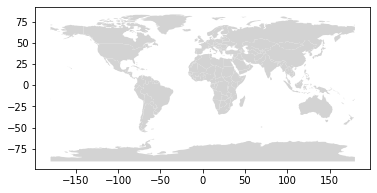

In [ ]:
countries.plot(color="lightgrey")

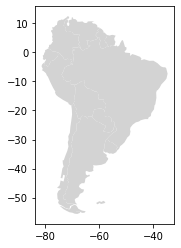

In [ ]:
countries[countries["continent"] == "South America"].plot(color="lightgrey")

In [ ]:
df.agg(Min_date=('report_date', np.min), Maximum_Date=('report_date', np.max))

,report_date
Min_date,2015-11-28
Maximum_Date,2018-06-30


In [ ]:
df1 =  df[(df['report_date'] > '2018-02-01') & (df['report_date'] <= '2018-02-28')]
df1

,report_date,country,cases,latitude,longitude
2474340,2018-02-03,Mexico,0,26.956,-101.470
2474341,2018-02-03,Mexico,0,28.627,-100.535
2474342,2018-02-03,Mexico,0,18.835,-99.261
2474343,2018-02-03,Mexico,0,16.449,-95.094
2474344,2018-02-03,Mexico,0,16.757,-99.754
...,...,...,...,...,...
2500063,2018-02-24,Mexico,0,19.397,-102.039
2500064,2018-02-24,Mexico,0,19.146,-96.187
2500065,2018-02-24,Mexico,0,17.997,-92.817
2500066,2018-02-24,Mexico,0,22.897,-102.687


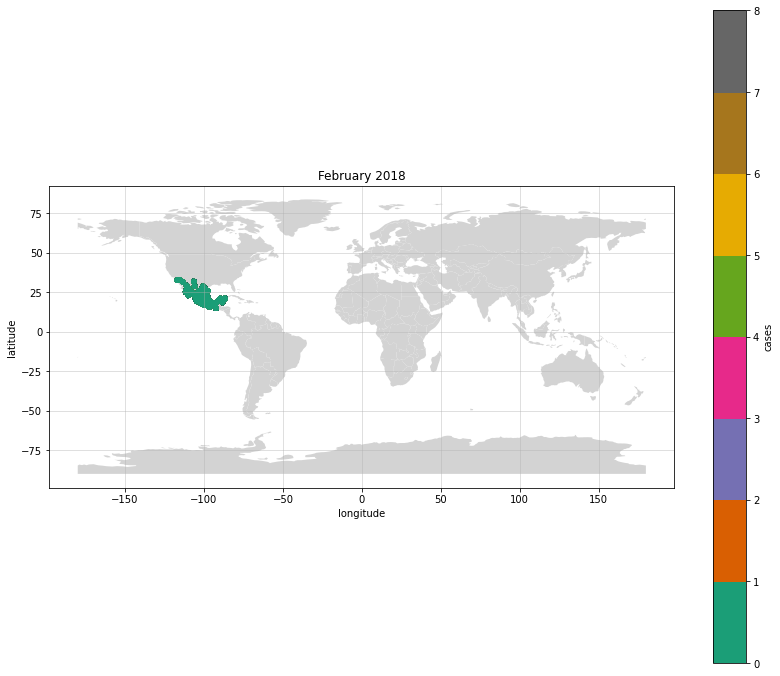

In [ ]:
# initialize an axis
fig, ax = plt.subplots(figsize=(14,12))

# plot map on axis
countries = gpd.read_file(  gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)

# plot points
df1.plot(x="longitude", y="latitude", kind="scatter", 
        c="cases",  colormap="Dark2", 
        title='February 2018', 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()